In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
import pathlib

In [18]:
def from_keras_model(kmodel):
        converter = tf.lite.TFLiteConverter.from_keras_model(kmodel)
        tflite_model = converter.convert()
        return tflite_model
    
def write_model(tflite_model,path):
    tflite_model_files = pathlib.Path(path)
    tflite_model_files.write_bytes(tflite_model)

In [19]:
# load the model
model = tf.keras.models.load_model(
    "/Users/msughter/projects/droneai/resources/my_final_model.h5"
)


# load the mobile net
mobile_net = model.get_layer("mobilenetv2_1.00_224")

# custom model to return the output of the first convolution layer
model_conv_1 = Model(inputs=mobile_net.inputs, outputs=mobile_net.layers[1].output)


In [20]:
tflite_model = from_keras_model(model_conv_1)
write_model(tflite_model,'model_conv_1.tflite')

INFO:tensorflow:Assets written to: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmp_hnyqflp/assets


INFO:tensorflow:Assets written to: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmp_hnyqflp/assets
2022-11-28 14:43:19.836550: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-28 14:43:19.837740: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-28 14:43:19.843597: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmp_hnyqflp
2022-11-28 14:43:19.845066: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-28 14:43:19.845148: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmp_hnyqflp
2022-11-28 14:43:19.872535: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-28 14:43:19.973282: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

In [21]:
tflite_disease_model = from_keras_model(model) 
write_model(tflite_disease_model,'plant_diseas_model.tflite')

INFO:tensorflow:Assets written to: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpymc55nie/assets


INFO:tensorflow:Assets written to: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpymc55nie/assets
2022-11-28 14:46:38.289389: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-28 14:46:38.289449: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-28 14:46:38.289891: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpymc55nie
2022-11-28 14:46:38.360545: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-28 14:46:38.360584: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpymc55nie
2022-11-28 14:46:38.621511: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-28 14:46:39.425190: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

In [23]:
# load the vgg model
from keras.applications.vgg16 import VGG16

# load the model
vgg = VGG16()

In [25]:
# create a model from the inputs to the first convolution layer
vgg_conv_1 = Model(inputs=vgg.inputs,outputs=vgg.layers[1].output)
# fdd
tflite_vgg_conv_1 = from_keras_model(vgg_conv_1)
write_model(tflite_vgg_conv_1,'tflite_vgg_conv_1.tflite')

INFO:tensorflow:Assets written to: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpk6pns5zy/assets


INFO:tensorflow:Assets written to: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpk6pns5zy/assets
2022-11-28 14:56:28.102915: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-28 14:56:28.102937: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-28 14:56:28.103209: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpk6pns5zy
2022-11-28 14:56:28.104119: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-28 14:56:28.104134: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/1d/bsb5054s6jqfmkmqs04j7lmh0000gn/T/tmpk6pns5zy
2022-11-28 14:56:28.107365: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-28 14:56:28.130735: I tensorflow/cc/saved_model/loader.cc:213] Running initialization

In [27]:
# load the model and get all the proper information
# Load TFLite model and allocate tensors.
model_conv_1 = tf.lite.Interpreter(model_path="model_conv_1.tflite")
model_conv_1.allocate_tensors()

# Get input and output tensors.
input_details = model_conv_1.get_input_details()
output_details = model_conv_1.get_output_details()
print('INPUT DETAILS')
print(input_details)
print('OUTPUT DETAILS')
print(output_details)


INPUT DETAILS
[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
OUTPUT DETAILS
[{'name': 'StatefulPartitionedCall:0', 'index': 3, 'shape': array([  1, 112, 112,  32], dtype=int32), 'shape_signature': array([ -1, 112, 112,  32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [29]:
vgg_conv_1 = tf.lite.Interpreter(model_path="tflite_vgg_conv_1.tflite")
vgg_conv_1.allocate_tensors()

# Get input and output tensors.
input_details = vgg_conv_1.get_input_details()
output_details = vgg_conv_1.get_output_details()
print('INPUT DETAILS')
print(input_details)
print('OUTPUT DETAILS')
print(output_details)

INPUT DETAILS
[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
OUTPUT DETAILS
[{'name': 'StatefulPartitionedCall:0', 'index': 3, 'shape': array([  1, 224, 224,  64], dtype=int32), 'shape_signature': array([ -1, 224, 224,  64], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [30]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

img = load_img('test_image_2.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# preprocess image
img = preprocess_input(img)

In [31]:
def tflite_predict(input_model,data):
    input_model.set_tensor(input_details[0]['index'], data)
    input_model.invoke()
    output_data = input_model.get_tensor(output_details[0]['index'])
    return output_data
    

In [32]:

output_data = tflite_predict(vgg_conv_1,img)

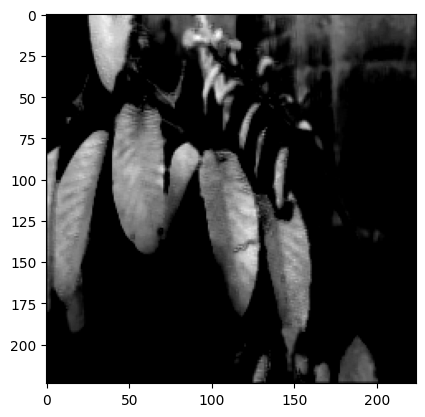

In [34]:
import matplotlib.pyplot as plt
plt.imshow(output_data[0,:,:,50],cmap='gray')
plt.show()

In [ ]:
# as we can see from the above image the prediction worked well